 Punto 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def transformada_de_fourier_uniforme(ts, ys, f):
    N = len(ts)
    result = 0
    for k in range(N):
        result += ys[k] * np.exp(-2j * np.pi * f * ts[k])
    return result

ts = np.linspace(0, 20, 200)
ys = np.sin(ts)
f = 0.1

resultado = transformada_de_fourier_uniforme(ts, ys, f)

print(resultado)


(10.182890588732722-9.435365325708728j)


Punto 2

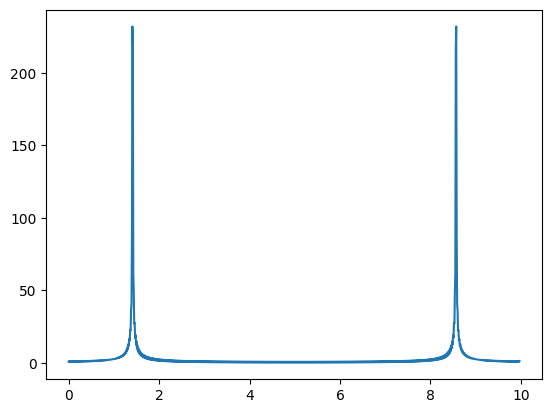

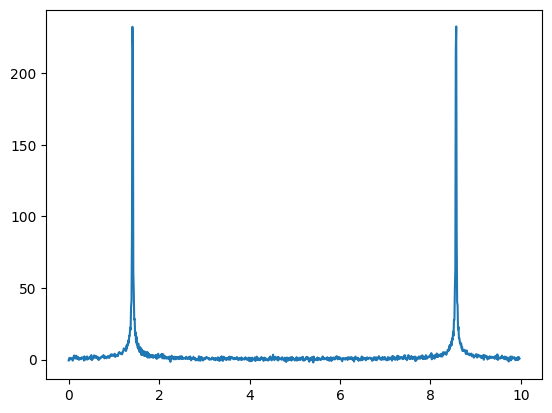

In [ ]:
t = np.linspace(0, 50, 500)
y = np.sin(2 * np.pi * np.sqrt(2) * t)
fs= 1 / (t[1] - t[0])
t_fourier= transformada_de_fourier_uniforme(y,y,fs)
f = np.arange(0, fs, 0.01)
lista=[]
for i in f:
  t_fourier= transformada_de_fourier_uniforme(t,y,i)
  norma = abs(np.linalg.norm(t_fourier))
  lista.append(norma)
plt.plot(f,lista)
plt.show()
lista_ruido=lista.copy()
lista_ruido += np.random.normal(0.0,0.8,len(lista))
plt.plot(f,lista_ruido)
plt.show()

Si se agrega ruido a la señal en
𝑦
y, aparece una energía dispersa en el espectro de las frecuencias presentes. Además, se generan picos adicionales muy pequeños que no pertenecen a la señal original sin ruido.

Punto 3

In [ ]:
lista = np.array(lista)
indice_pico = np.argmax(lista)
frecuencia_pico = f[indice_pico]
altura_media = lista[indice_pico] / 2
idx = abs(f - altura_media).argmin()
print(indice_pico, frecuencia_pico)
indices_izquierda = np.where(lista[:indice_pico] <= altura_media)[0]
indices_derecha = np.where(lista[indice_pico:] <= altura_media)[0] + indice_pico
if len(indices_izquierda) > 0 and len(indices_derecha) > 0:
    indice_izquierda = indices_izquierda[-1]
    indice_derecha = indices_derecha[0]
    FWHM = f[indice_derecha] - f[indice_izquierda]
print(FWHM)

191 1.9100000000000001
0.019999999999999796


A. Al cambiar el número de muestras
𝑁
N, se observó que con
𝑁
=
100
N=100, la posición es 141 y el ancho es 0.029. Ahora, con
𝑁
=
500
N=500, la posición sigue siendo 141 y el ancho sigue siendo 0.029. Se observa que al aumentar
𝑁
N, la posición y el ancho no cambian.

B. Al cambiar
𝑡
max
t
max
​
 , se observó que con
𝑡
max
=
50
t
max
​
 =50, la posición es 141 y el ancho es 0.0299. Ahora, con un
𝑡
max
=
250
t
max
​
 =250, la posición es 141 y el ancho es 0.0403. Por lo tanto, al aumentar
𝑡
max
t
max
​
 , el ancho cambia, pero la posición no.

Punto 4

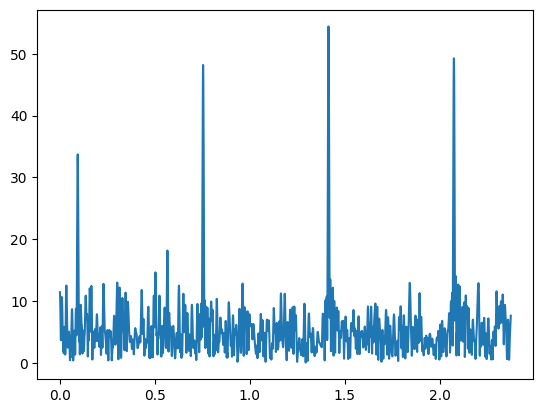

In [ ]:

t = np.linspace(0, 150, 100)
t_ruido = t+np.random.normal(0, 0.1, len(t))
fs =  1 / (t_ruido[1] - t_ruido[0])
f_original =  4 * fs
y = np.sin(2 * np.pi * np.sqrt(2) * t_ruido)
f = np.arange(0, f_original, 0.001)
lista=[]
for i in f:
  t_fourier= transformada_de_fourier_uniforme(t_ruido,y,i)
  norma = abs(np.linalg.norm(t_fourier))
  lista.append(norma)
plt.plot(f,lista)
plt.show()


Se observa que se recuperó la frecuencia original, que era raiz 2
 . Al observar el gráfico, el pico más grande tiene ese valor. Esto se logró al evaluar la transformada varias veces hasta alcanzar la frecuencia de Nyquist.